# Instalação de Bibliotecas

Podemos executar a instalação de bibliotecas faltantes por meio de chamadas ao gerenciador de pacotes.

In [1]:
!pip install numpy 
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install sklearn

In [2]:
# inicialmente montamos o drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

arq_dados_stream = '/content/drive/MyDrive/FIAP/DAN-BD/netflix_titles.csv'
df_dados_stream = pd.read_csv(arq_dados_stream)
df_dados_stream.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


show_id  ...                                        description
0      s1  ...  As her father nears the end of his life, filmm...
1      s2  ...  After crossing paths at a party, a Cape Town t...
2      s3  ...  To protect his family from a powerful drug lor...
3      s4  ...  Feuds, flirtations and toilet talk go down amo...
4      s5  ...  In a city of coaching centers known to train I...
5      s6  ...  The arrival of a charismatic young priest brin...
6      s7  ...  Equestria's divided. But a bright-eyed hero be...
7      s8  ...  On a photo shoot in Ghana, an American model s...
8      s9  ...  A talented batch of amateur bakers face off in...
9     s10  ...  A woman adjusting to life after a loss contend...

[10 rows x 12 columns]

# Exploração dos Dados

In [3]:
df_dados_stream['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

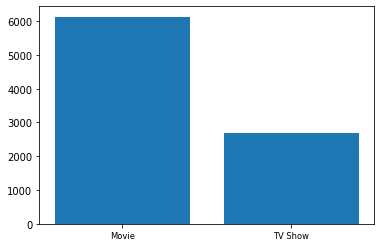

In [4]:
import matplotlib.pyplot as plt 

contagem_tipo_conteudo = df_dados_stream.type.value_counts()

plt.bar(range(len(contagem_tipo_conteudo)), contagem_tipo_conteudo.values, align='center')
plt.xticks(range(len(contagem_tipo_conteudo)), contagem_tipo_conteudo.index.values, size='small')
plt.show()


In [7]:
idx_movies = (df_dados_stream['type'] == 'Movie')

df_dados_movies = df_dados_stream[ idx_movies ]

df_dados_movies


show_id  ...                                        description
0         s1  ...  As her father nears the end of his life, filmm...
6         s7  ...  Equestria's divided. But a bright-eyed hero be...
7         s8  ...  On a photo shoot in Ghana, an American model s...
9        s10  ...  A woman adjusting to life after a loss contend...
12       s13  ...  After most of her family is murdered in a terr...
...      ...  ...                                                ...
8801   s8802  ...  Recovering alcoholic Talal wakes up inside a s...
8802   s8803  ...  A political cartoonist, a crime reporter and a...
8804   s8805  ...  Looking to survive in a world taken over by zo...
8805   s8806  ...  Dragged from civilian life, a former superhero...
8806   s8807  ...  A scrappy but poor boy worms his way into a ty...

[6131 rows x 12 columns]

Qual distribuição dos filmes?


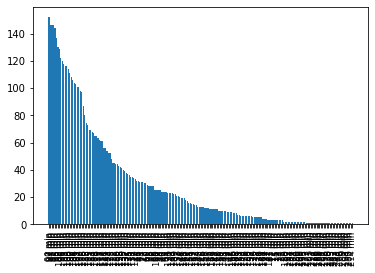

In [ ]:
import matplotlib.pyplot as plt 

atributo = 'duration'

contagem_tipo_conteudo = df_dados_movies[atributo].value_counts()
plt.bar(range(len(contagem_tipo_conteudo)), contagem_tipo_conteudo.values, align='center')
plt.xticks(range(len(contagem_tipo_conteudo)), contagem_tipo_conteudo.index.values, size='small', rotation=90)
plt.show()

In [8]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline

data = df_dados_movies[['duration', 'title', 'release_year']].copy()

data.dropna()

data['duration'] = data['duration'].apply( lambda x:round(float(str(x).split()[0]),2))
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


duration                             title  release_year
0         90.0              Dick Johnson Is Dead          2020
6         91.0  My Little Pony: A New Generation          2021
7        125.0                           Sankofa          1993
9        104.0                      The Starling          2021
12       127.0                      Je Suis Karl          2021
...        ...                               ...           ...
8801      96.0                           Zinzana          2015
8802     158.0                            Zodiac          2007
8804      88.0                        Zombieland          2009
8805      88.0                              Zoom          2006
8806     111.0                            Zubaan          2015

[6131 rows x 3 columns]

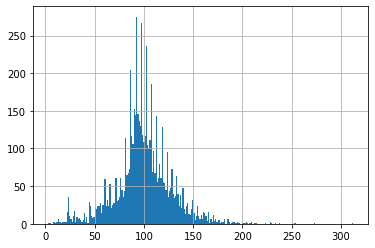

In [14]:
data['duration'].hist(bins=250)

In [22]:
media = data['duration'].mean()
mediana = data['duration'].median()
desvio_padrao = data['duration'].std()

print(f"Média: {round(media,2)}")
print(f"Mediana: {round(mediana,2)}")
print(f"Desvio padrão: {round(desvio_padrao,2)}")


Média: 99.58
Mediana: 98.0
Desvio padrão: 28.29


In [18]:
duracoes

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

In [23]:
duracoes = pd.Series(data['duration'], dtype='int64')
duracoes

idx_ok = np.isfinite(data['duration'])
data = data[idx_ok]
data

duration                             title  release_year
0         90.0              Dick Johnson Is Dead          2020
6         91.0  My Little Pony: A New Generation          2021
7        125.0                           Sankofa          1993
9        104.0                      The Starling          2021
12       127.0                      Je Suis Karl          2021
...        ...                               ...           ...
8801      96.0                           Zinzana          2015
8802     158.0                            Zodiac          2007
8804      88.0                        Zombieland          2009
8805      88.0                              Zoom          2006
8806     111.0                            Zubaan          2015

[6128 rows x 3 columns]

In [24]:
import scipy.stats as st

dist = st.norm  # distribuição normal

args = dist.fit(duracoes)
print(f"Argumentos: {args}")

Argumentos: (99.57718668407311, 28.288285047638155)


In [ ]:
# Kolmogorov-Smirnov test

st.kstest(duracoes, dist.cdf, args)

KstestResult(statistic=0.08521089998800485, pvalue=4.5014804523692834e-39)

In [ ]:
st.shapiro(duracoes)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9692173600196838, 2.66906805983873e-34)

In [ ]:
st.anderson(duracoes, dist='norm')



AndersonResult(statistic=57.283000176068526, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [20]:
dists = ['norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r', 'extreme1']

for d in dists:
  r = st.anderson(duracoes, dist=d)
  print(f"Distribuição {d}")
  print("\t", r)

Distribuição norm
	 AndersonResult(statistic=57.283000176068526, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribuição expon
	 AndersonResult(statistic=1509.5993183448827, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribuição logistic
	 AndersonResult(statistic=20.763684827951693, critical_values=array([0.426, 0.563, 0.66 , 0.769, 0.906, 1.01 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))
Distribuição gumbel
	 AndersonResult(statistic=316.03286770148225, critical_values=array([0.473, 0.635, 0.755, 0.875, 1.035]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))
Distribuição gumbel_l
	 AndersonResult(statistic=316.03286770148225, critical_values=array([0.473, 0.635, 0.755, 0.875, 1.035]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))
Distribuição gumbel_r
	 AndersonResult(statistic=197.54959118

CENÁRIO: Temos um usuário do serviço de streaming, com a sua sugestão de filmes gerada por meio do processo de selecionar uma das combinações aleatórias e o mesmo utiliza um botão de seleção aleatória para escolher um filme. 
De acordo com o histórico do usuário, ele não costuma assistir filmes longos até o final.

QUESTIONAMENTO: Qual a probabilidade da seleção aleatória trazer para ele um filme entre 60 e 90 minutos?

In [25]:
# problema 1

   
p_60 = st.norm.cdf(x = 60, loc = media, scale = desvio_padrao)

p_90 = st.norm.cdf(x = 90, loc = media, scale = desvio_padrao)

p_90 - p_60



0.28656861803155514